# Read in all data

In [119]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [120]:
# Import data
import pandas as pd
allData = pd.read_csv('dataData.csv', encoding='windows-1252')

allData = allData.dropna()
allData = allData.replace('#VALUE!',0)

tickers = allData.loc[:, allData.columns == 'Ticker (all values in $ billions)']

allData = allData.loc[:, allData.columns != 'Ticker (all values in $ billions)']

allData.columns = allData.columns.str.strip()
allData.columns = allData.columns.str.replace(' ', '')
allData.columns = allData.columns.str.replace(',', '')
allData.columns = allData.columns.str.replace('_', '')
allData.columns = allData.columns.str.replace('+', '')
allData.columns = allData.columns.str.replace('-', '')
allData.columns = allData.columns.str.replace('%', '')
allData.columns = allData.columns.str.replace('/', '')
allData.columns = allData.columns.str.replace('&', '')
allData.columns = allData.columns.str.replace('(', '')
allData.columns = allData.columns.str.replace("'", "")
allData.columns = allData.columns.str.replace(')', '')
allData.columns = allData.columns.str.replace('—', '')
allData = allData.convert_objects(convert_numeric=True)

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [121]:
# Get values by year

cols2017 = [col for col in allData.columns if '2017' in col]
cols2016 = [col for col in allData.columns if '2016' in col]
cols2015 = [col for col in allData.columns if '2015' in col]
cols2014 = [col for col in allData.columns if '2014' in col]
cols2013 = [col for col in allData.columns if '2013' in col]
cols2012 = [col for col in allData.columns if '2012' in col]

# Doesn't have change in market cap data and thus makes this analysis much harder
# cols2011 = [col for col in allData.columns if '2011' in col]

# Split data by year

data2012 = allData[cols2012]
data2013 = allData[cols2013]
data2014 = allData[cols2014]
data2015 = allData[cols2015]
data2016 = allData[cols2016]
data2017 = allData[cols2017]

In [122]:
# Make all values numeric

data2012 = data2012.convert_objects(convert_numeric=True)
data2013 = data2013.convert_objects(convert_numeric=True)
data2014 = data2014.convert_objects(convert_numeric=True)
data2015 = data2015.convert_objects(convert_numeric=True)
data2016 = data2016.convert_objects(convert_numeric=True)
data2017 = data2017.convert_objects(convert_numeric=True)

data2012 = data2012.dropna()
data2013 = data2013.dropna()
data2014 = data2014.dropna()
data2015 = data2015.dropna()
data2016 = data2016.dropna()
data2017 = data2017.dropna()

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.t

# Function for assessing significance

In [123]:
import statsmodels.formula.api as smf 

def statSigOverall(yearlyData, check = True):
    marketCapGrowth = yearlyData[yearlyData.columns[1]]
    #print(marketCapGrowth)
    yearlyData = yearlyData.loc[:,~yearlyData.columns.str.startswith('MarketCapitalization')]
    yearlyData = yearlyData.loc[:,~yearlyData.columns.str.startswith('SP500GrowthYoY')]
    yearlyData = yearlyData.loc[:,~yearlyData.columns.str.startswith('EnterpriseValueFY')]
    yearlyData = yearlyData.loc[:,~yearlyData.columns.str.startswith('EnterpriseValueGrowthYoY')]    
    yearlyData = yearlyData.loc[:,~yearlyData.columns.str.startswith('RelativePerformancetoSP500')]
    columnNames = [yearlyData.columns]
    w, h = 3, len(yearlyData.columns);
    allMarketStats = [[0 for x in range(w)] for y in range(h)] 
    #print(allMarketStats)
    for x in range(len(yearlyData.columns)):
        #print(columnNames[0][x])
        name = columnNames[0][x]
        allMarketStats[x][0] = name
        value = yearlyData[name]        
        regression = smf.ols(formula = 'marketCapGrowth ~ value', data=yearlyData).fit()       
        allMarketStats[x][1] = float(regression.pvalues.value)
        #print(float(regression.pvalues.value))
        allMarketStats[x][2] = regression.rsquared_adj
        #print(regression.rsquared_adj)
    if check:        
        return filterStatSig(allMarketStats)
    else:
        return allMarketStats

In [124]:
def filterStatSig(marketStats):
    statSigValues = []
    for x in range(len(marketStats)):
        check = marketStats[x][1]
        if check < .05:
            statSigValues.append(marketStats[x])
    return statSigValues

# statSigOverall w/All Significant Values

In [125]:
statSig2012 = pd.DataFrame(statSigOverall(data2012), columns = ['Item', 'pvalue', 'r2']) 
statSig2013 = pd.DataFrame(statSigOverall(data2013), columns = ['Item', 'pvalue', 'r2']) 
statSig2014 = pd.DataFrame(statSigOverall(data2014), columns = ['Item', 'pvalue', 'r2'])
statSig2015 = pd.DataFrame(statSigOverall(data2015), columns = ['Item', 'pvalue', 'r2'])
statSig2016 = pd.DataFrame(statSigOverall(data2016), columns = ['Item', 'pvalue', 'r2'])
statSig2017 = pd.DataFrame(statSigOverall(data2017), columns = ['Item', 'pvalue', 'r2'])

In [126]:
allStatSig = pd.concat([statSig2012,statSig2013,statSig2014,statSig2015,statSig2016,statSig2017],ignore_index=True)
allStatSig = allStatSig.sort_values(by='r2', ascending=False)
allStatSig

,Item,pvalue,r2
24,EPSGrowthYoYFY2013,1.644281e-22,0.396824
2,EnterpriseValuetoEBITDAFY2012,2.004875e-14,0.266645
63,PriceEarningsRatioPEFY2015,8.422968e-13,0.235916
53,RevenueGrowthYoYFY2015,4.129088e-12,0.223033
20,EnterpriseValuetoFreeCashFlowFY2013,1.442112e-11,0.212756
52,EnterpriseValuetoEBITDAFY2015,1.026837e-10,0.196374
37,RevenueGrowthYoYFY2014,1.952884e-10,0.190942
19,EnterpriseValuetoEBITDAFY2013,1.968997e-09,0.171144
64,EarningsYieldFY2015,2.129815e-09,0.170464
41,CashfromOperationsGrowthYoYFY2014,1.810350e-08,0.151740


In [127]:
itemList = [statSig2012, statSig2013, statSig2014, statSig2015, statSig2016, statSig2017]
items = []

for num in itemList:
    my_list = num["Item"].tolist()
    for i in range(len(my_list)):
        feature = my_list[i]
        items.append(feature[:-6])        
items

from collections import Counter
#list1 = [13, 19, 13, 2, 16, 6, 5, 19, 20, 21, 20, 13, 19, 13, 16]
c = Counter(items)
# print(c)
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Event', 0:'Count'})
df["FreqByYear "] = round(df['Count'] / 6, 2) 
df = df.sort_values(by='Count', ascending=False)
# print(df['Count'].sum()) - Use to verify data transfer process
df

,Event,Count,FreqByYear
2,EnterpriseValuetoEBITDA,6,1.00
15,EarningsYield,6,1.00
13,PriceEarningsRatioPE,6,1.00
1,EnterpriseValuetoRevenue,5,0.83
18,RevenueGrowthYoY,5,0.83
0,NetDebttoEBITDA,4,0.67
12,WeightedAverageCostofCap,4,0.67
24,PricetoSalesRatio,4,0.67
32,RDExpendituretoNetSales,3,0.50
20,EPSGrowthYoY,3,0.50


# statSigPositiveReturns w/All Significant Values

In [128]:
beatMarketStatSig2012 = pd.DataFrame(statSigOverall(data2012[data2012['RelativePerformancetoSP500YoYFY2012'] > 0]), columns = ['Item', 'pvalue', 'r2'])
beatMarketStatSig2013 = pd.DataFrame(statSigOverall(data2013[data2013['RelativePerformancetoSP500YoYFY2013'] > 0]), columns = ['Item', 'pvalue', 'r2']) 
beatMarketStatSig2014 = pd.DataFrame(statSigOverall(data2014[data2014['RelativePerformancetoSP500YoYFY2014'] > 0]), columns = ['Item', 'pvalue', 'r2'])
beatMarketStatSig2015 = pd.DataFrame(statSigOverall(data2015[data2015['RelativePerformancetoSP500YoYFY2015'] > 0]), columns = ['Item', 'pvalue', 'r2'])
beatMarketStatSig2016 = pd.DataFrame(statSigOverall(data2016[data2016['RelativePerformancetoSP500YoYFY2016'] > 0]), columns = ['Item', 'pvalue', 'r2'])
beatMarketStatSig2017 = pd.DataFrame(statSigOverall(data2017[data2017['RelativePerformancetoSP500YoYFY2017'] > 0]), columns = ['Item', 'pvalue', 'r2'])

In [129]:
beatMarketStatSig = pd.concat([beatMarketStatSig2012,beatMarketStatSig2013,beatMarketStatSig2014,beatMarketStatSig2015,beatMarketStatSig2016,beatMarketStatSig2017],ignore_index=True)
beatMarketStatSig = beatMarketStatSig.sort_values(by='r2', ascending=False)
beatMarketStatSig

,Item,pvalue,r2
15,EnterpriseValuetoFreeCashFlowFY2013,4.961390e-24,0.689526
17,EPSGrowthYoYFY2013,3.856872e-23,0.674616
20,PriceEarningsRatioPEFY2013,2.551690e-16,0.534317
37,PriceEarningsRatioPEFY2015,1.860494e-09,0.302456
23,RevenueGrowthYoYFY2014,8.515626e-09,0.269293
1,EnterpriseValuetoEBITDAFY2012,8.668703e-08,0.260855
24,EBITDAGrowthYoYFY2014,4.413625e-08,0.246163
34,CashfromOperationsGrowthYoYFY2015,2.078679e-07,0.233798
4,EBITDAGrowthYoYFY2012,9.782503e-07,0.222076
7,CashfromOperationsGrowthYoYFY2012,2.140362e-06,0.209172


In [130]:
itemListBeatMarket = [beatMarketStatSig2012,beatMarketStatSig2013,beatMarketStatSig2014,beatMarketStatSig2015,beatMarketStatSig2016,beatMarketStatSig2017]
itemsBeatMarket = []

for num in itemListBeatMarket:
    my_list = num["Item"].tolist()
    for i in range(len(my_list)):
        feature = my_list[i]
        itemsBeatMarket.append(feature[:-6])        
itemsBeatMarket

from collections import Counter
c = Counter(itemsBeatMarket)
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Event', 0:'Count'})
df["FreqByYear "] = round(df['Count'] / 6, 2) 
df = df.sort_values(by='Count', ascending=False)
print(df['Count'].sum()) # - Use to verify data transfer process
df

61


,Event,Count,FreqByYear
3,RevenueGrowthYoY,5,0.83
15,PriceEarningsRatioPE,4,0.67
16,EarningsYield,4,0.67
4,EBITDAGrowthYoY,4,0.67
7,CashfromOperationsGrowthYoY,3,0.50
1,EnterpriseValuetoEBITDA,3,0.50
9,WeightedAverageCostofCap,3,0.50
0,NetDebttoEBITDA,3,0.50
5,NetIncomeGrowthYoY,3,0.50
8,FreeCashFlowGrowthYoY,2,0.33


# statSigNegativeReturns w/All Significant Values

In [131]:
loseMarketStatSig2012 = pd.DataFrame(statSigOverall(data2012[data2012['RelativePerformancetoSP500YoYFY2012'] < 0]), columns = ['Item', 'pvalue', 'r2'])
loseMarketStatSig2013 = pd.DataFrame(statSigOverall(data2013[data2013['RelativePerformancetoSP500YoYFY2013'] < 0]), columns = ['Item', 'pvalue', 'r2']) 
loseMarketStatSig2014 = pd.DataFrame(statSigOverall(data2014[data2014['RelativePerformancetoSP500YoYFY2014'] < 0]), columns = ['Item', 'pvalue', 'r2'])
loseMarketStatSig2015 = pd.DataFrame(statSigOverall(data2015[data2015['RelativePerformancetoSP500YoYFY2015'] < 0]), columns = ['Item', 'pvalue', 'r2'])
loseMarketStatSig2016 = pd.DataFrame(statSigOverall(data2016[data2016['RelativePerformancetoSP500YoYFY2016'] < 0]), columns = ['Item', 'pvalue', 'r2'])
loseMarketStatSig2017 = pd.DataFrame(statSigOverall(data2017[data2017['RelativePerformancetoSP500YoYFY2017'] < 0]), columns = ['Item', 'pvalue', 'r2'])

In [132]:
loseMarketStatSig = pd.concat([loseMarketStatSig2012,loseMarketStatSig2013,loseMarketStatSig2014,loseMarketStatSig2015,loseMarketStatSig2016,loseMarketStatSig2017],ignore_index=True)
loseMarketStatSig = loseMarketStatSig.sort_values(by='r2', ascending=False)
loseMarketStatSig

,Item,pvalue,r2
22,EarningsYieldFY2016,0.000003,0.210824
8,EBITDAGrowthYoYFY2015,0.001404,0.101015
2,PreferredOtherGrowthYoYFY2014,0.002077,0.098952
24,EnterpriseValuetoRevenueFY2017,0.000844,0.091727
28,PricetoSalesRatioFY2017,0.001534,0.082176
14,ReturnonCapitalFY2015,0.006325,0.072028
30,PriceEarningsRatioPEFY2017,0.003182,0.070468
16,SustainableGrowthRateFY2015,0.007770,0.068056
15,ReturnonInvestedCapitalFY2015,0.009338,0.064507
13,ReturnonAssetsFY2015,0.014351,0.056225


In [133]:
itemListLoseMarket = [loseMarketStatSig2012,loseMarketStatSig2013,loseMarketStatSig2014,loseMarketStatSig2015,loseMarketStatSig2016,loseMarketStatSig2017]
itemsLoseMarket = []

for num in itemListLoseMarket:
    my_list = num["Item"].tolist()
    for i in range(len(my_list)):
        feature = my_list[i]
        itemsLoseMarket.append(feature[:-6])        
itemsLoseMarket

from collections import Counter
c = Counter(itemsLoseMarket)
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Event', 0:'Count'})
df["FreqByYear "] = round(df['Count'] / 6, 2) 
df = df.sort_values(by='Count', ascending=False)
print(df['Count'].sum()) # - Use to verify data transfer process
df

32


,Event,Count,FreqByYear
5,PricetoSalesRatio,3,0.50
15,ReturnonInvestedCapital,2,0.33
3,EnterpriseValuetoRevenue,2,0.33
20,EarningsYield,2,0.33
0,CapitalExpendituresGrowthYoY,1,0.17
25,Trailing12MEBITMargin,1,0.17
24,AssetTurnover,1,0.17
23,OperatingMargin,1,0.17
22,EBITDAMargin,1,0.17
21,CashEquivalentsGrowthYoY,1,0.17


# Compare Beat Market Stats to Lose Market Stats

In [134]:
#data2012 = data2012.rename(columns = lambda x : str(x)[:-6])
#data2013 = data2013.rename(columns = lambda x : str(x)[:-6])
#data2014 = data2014.rename(columns = lambda x : str(x)[:-6])
#data2015 = data2015.rename(columns = lambda x : str(x)[:-6])
#data2016 = data2016.rename(columns = lambda x : str(x)[:-6])
#data2017 = data2017.rename(columns = lambda x : str(x)[:-6])

data2012 = data2012.rename(columns = {'RelativePerformancetoSP500YoYFY2012':'RelativePerformancetoSP500YoY'})
data2013 = data2013.rename(columns = {'RelativePerformancetoSP500YoYFY2013':'RelativePerformancetoSP500YoY'})
data2014 = data2014.rename(columns = {'RelativePerformancetoSP500YoYFY2014':'RelativePerformancetoSP500YoY'})
data2015 = data2015.rename(columns = {'RelativePerformancetoSP500YoYFY2015':'RelativePerformancetoSP500YoY'})
data2016 = data2016.rename(columns = {'RelativePerformancetoSP500YoYFY2016':'RelativePerformancetoSP500YoY'})
data2017 = data2017.rename(columns = {'RelativePerformancetoSP500YoYFY2017':'RelativePerformancetoSP500YoY'})

data2012 = data2012.rename(columns = {'SP500GrowthYoYFY2012':'SP500GrowthYoY'})
data2013 = data2013.rename(columns = {'SP500GrowthYoYFY2013':'SP500GrowthYoY'})
data2014 = data2014.rename(columns = {'SP500GrowthYoYFY2014':'SP500GrowthYoY'})
data2015 = data2015.rename(columns = {'SP500GrowthYoYFY2015':'SP500GrowthYoY'})
data2016 = data2016.rename(columns = {'SP500GrowthYoYFY2016':'SP500GrowthYoY'})
data2017 = data2017.rename(columns = {'SP500GrowthYoYFY2017':'SP500GrowthYoY'})

# Full Strategy - Long prior year outperform based on statistically significant values

In [135]:
# Building the botton value into a function

import scipy
from scipy import stats

def statSigReturns(beatMarketStatSig, loseMarketStatSig, dataYear):
    loseData = dataYear[dataYear['RelativePerformancetoSP500YoY'] < 0]
    loseData = loseData[loseData.columns[4:]]
    loseData = pd.DataFrame(loseData.mean())
    beatData = dataYear[dataYear['RelativePerformancetoSP500YoY'] > 0]
    beatData = beatData[beatData.columns[4:]]
    beatData = pd.DataFrame(beatData.mean())
    beatData['Lose'] = loseData[0]
    beatData.columns = ['Win', 'Lose']
    beatData['Difference'] = beatData['Win'] - beatData['Lose']
    beatData['Item'] = beatData.index
    long = beatData.loc[beatData['Item'].isin(beatMarketStatSig['Item'])]
    short = beatData.loc[beatData['Item'].isin(loseMarketStatSig['Item'])]
    long['PercentageDiff'] = long.apply(lambda row: (row.iloc[0]-row.iloc[1])/row.iloc[0]*100, axis=1) 
    #long['PercentageDiff'] = long['PercentageDiff'].abs()
    #long = long.loc[long['PercentageDiff'] > 5]
    short['PercentageDiff'] = short.apply(lambda row: (row.iloc[0]-row.iloc[1])/row.iloc[0]*100, axis=1) 
    #short['PercentageDiff'] = short['PercentageDiff'].abs()
    #short = short.loc[short['PercentageDiff'] > 5]
    
    long['pvalue'] = long['Win']
    
    for i in range(0, len(long)):
        if i - 1 >= 0:
            sample1 = long['Win'].iloc[i]
            sample2 = long['Lose'].iloc[i]
            winData = dataYear[dataYear['RelativePerformancetoSP500YoY'] > 0]
            loseData = dataYear[dataYear['RelativePerformancetoSP500YoY'] < 0]
            long['pvalue'].iloc[i] = scipy.stats.ttest_ind(winData[long['Item'].iloc[i]], loseData[long['Item'].iloc[i]], equal_var=False).pvalue        
    long['pvalue'] = long['pvalue'].abs()
    long = long.loc[long['pvalue'] < .05]
    
    short['pvalue'] = short['Win']

    for i in range(0, len(short)):
        if i - 1 >= 0:
            sample1 = short['Win'].iloc[i]
            sample2 = short['Lose'].iloc[i]
            winData = dataYear[dataYear['RelativePerformancetoSP500YoY'] > 0]
            loseData = dataYear[dataYear['RelativePerformancetoSP500YoY'] < 0]
            short['pvalue'].iloc[i] = scipy.stats.ttest_ind(winData[short['Item'].iloc[i]], loseData[short['Item'].iloc[i]], equal_var=False).pvalue        
    short['pvalue'] = short['pvalue'].abs()
    short = short.loc[short['pvalue'] < .05]
    
    return long, short 

In [136]:
def metricReturn(goLong, dataYear, nextDataYear, check = True):
    averageReturn = []
    if check:     
        outperform = dataYear[dataYear['RelativePerformancetoSP500YoY'] > 0]
        for i in range(0, len(goLong)):
            #print(goLong['Item'].iloc[i])
            if goLong['Win'].iloc[i] > goLong['Lose'].iloc[i]:        
                #print(long2014['Win'].iloc[i])
                specificMetric = outperform[outperform[goLong['Item'].iloc[i]] > goLong['Win'].iloc[i]]
                #print(specificMetric.index)
                metricBeat = specificMetric.index.values
                checkMetricBeat = []
                for k in metricBeat:
                    #print(k)
                    values = nextDataYear.loc[k]
                    #print(values[1])
                    checkMetricBeat.append(values[1])            
            else:
                #print(long2014['Win'].iloc[i])
                specificMetric = outperform[outperform[goLong['Item'].iloc[i]] < goLong['Win'].iloc[i]]
                #print(specificMetric.index)
                metricBeat = specificMetric.index.values
                checkMetricBeat = []
                for k in metricBeat:
                    #print(k)
                    values = nextDataYear.loc[k]
                #print(values[1])
                    checkMetricBeat.append(values[1])
            metricNextYearReturn = pd.DataFrame(checkMetricBeat, columns = ['Returns'])
            #print("Our return", metricNextYearReturn.mean())
            averageReturn.append(metricNextYearReturn.mean())
            #print("Market return", nextDataYear['SP500GrowthYoY'].mean())
            #print(metricNextYearReturn.mean() - nextDataYear['SP500GrowthYoY'].mean())
            checkMetricBeat = []
    else:
        outperform = dataYear[dataYear['RelativePerformancetoSP500YoY'] < 0]
        for i in range(0, len(goLong)):
            #print(goLong['Item'].iloc[i])
            if goLong['Win'].iloc[i] > goLong['Lose'].iloc[i]:        
                #print(long2014['Win'].iloc[i])
                specificMetric = outperform[outperform[goLong['Item'].iloc[i]] > goLong['Win'].iloc[i]]
                #print(specificMetric.index)
                metricBeat = specificMetric.index.values
                checkMetricBeat = []
                for k in metricBeat:
                    #print(k)
                    values = nextDataYear.loc[k]
                    #print(values[1])
                    checkMetricBeat.append(values[1])            
            else:
                #print(long2014['Win'].iloc[i])
                specificMetric = outperform[outperform[goLong['Item'].iloc[i]] < goLong['Win'].iloc[i]]
                #print(specificMetric.index)
                metricBeat = specificMetric.index.values
                checkMetricBeat = []
                for k in metricBeat:
                    #print(k)
                    values = nextDataYear.loc[k]
                #print(values[1])
                    checkMetricBeat.append(values[1])
            metricNextYearReturn = pd.DataFrame(checkMetricBeat, columns = ['Returns'])
            #print("Our return", metricNextYearReturn.mean())
            averageReturn.append(metricNextYearReturn.mean())
            #print("Market return", nextDataYear['SP500GrowthYoY'].mean())
            #print(metricNextYearReturn.mean() - nextDataYear['SP500GrowthYoY'].mean())
            checkMetricBeat = []
    averageReturn = pd.DataFrame(averageReturn, columns = ['Returns'])
    return float(nextDataYear['SP500GrowthYoY'].mean()), float(averageReturn.mean()) 

In [137]:
def returnAnalysis(totalMarketReturns, totalOurReturns):
    ourReturn = []
    marketReturn = [] 
    #print(totalOurReturns)
    ourReturnAmount = 1
    for i in totalOurReturns:
        ourReturnAmount = ourReturnAmount * (1 + (1 * i))
        ourReturn.append(ourReturnAmount)
        #print(ourReturnAmount)
    #print(totalMarketReturns)
    marketReturnAmount = 1
    for i in totalMarketReturns:
        marketReturnAmount = marketReturnAmount * (1 + (1 * i))
        marketReturn.append(marketReturnAmount)
        #print(marketReturnAmount)
    allReturnData = pd.DataFrame(ourReturn)
    allReturnData.columns = ['ourReturns']
    allReturnData['year'] = allReturnData.index    
    allReturnData['ourYearlyReturn'] = totalOurReturns 
    allReturnData['Market'] = marketReturn
    allReturnData['yearlyMarketReturn'] = totalMarketReturns
    allReturnData['ReturnDifference'] = allReturnData['ourReturns'] - allReturnData['Market']
    allReturnData['YearlyDifference'] = allReturnData['ourYearlyReturn'] - allReturnData['yearlyMarketReturn']
    return allReturnData

In [138]:
listAllData = [data2012, data2013, data2014, data2015, data2016, data2017]
listAllBMSS = [beatMarketStatSig2012,
beatMarketStatSig2013,
beatMarketStatSig2014,
beatMarketStatSig2015,
beatMarketStatSig2016,
beatMarketStatSig2017]
listAllLMSS = [
loseMarketStatSig2012,
loseMarketStatSig2013,
loseMarketStatSig2014,
loseMarketStatSig2015,
loseMarketStatSig2016,
loseMarketStatSig2017]

totalMarketReturns = []  
totalOurReturns =[]
    
for i in range(0,len(listAllData)):    
    if i != 5:
        good, bad = statSigReturns(listAllBMSS[i],listAllLMSS[i],listAllData[i])
        #print("This is a long dataframe", pd.DataFrame(good))
        #print("This is a short dataframe", pd.DataFrame(bad))
        #print("Outperform")
        marketReturn, ourOutperformReturn = metricReturn(good, listAllData[i], listAllData[i + 1])
        #print("Our return", ourOutperformReturn, "Market Return", marketReturn)
        #print("Underperform")        
        marketReturn, ourUnderperformReturn = metricReturn(bad, listAllData[i], listAllData[i + 1], check = False)
        #print("Our return", ourUnderperformReturn, "Market Return", marketReturn)
        totalMarketReturns.append(marketReturn)
        totalOurReturns.append(ourOutperformReturn)
returns = returnAnalysis(totalMarketReturns, totalOurReturns)
returns

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

,ourReturns,year,ourYearlyReturn,Market,yearlyMarketReturn,ReturnDifference,YearlyDifference
0,1.369450,0,0.369450,1.296000,0.2960,0.073450,0.073450
1,1.567344,1,0.144507,1.443614,0.1139,0.123730,0.030607
2,1.730404,2,0.104035,1.433076,-0.0073,0.297328,0.111335
3,1.823213,3,0.053635,1.569791,0.0954,0.253422,-0.041765
4,2.115069,4,0.160078,1.874645,0.1942,0.240424,-0.034122


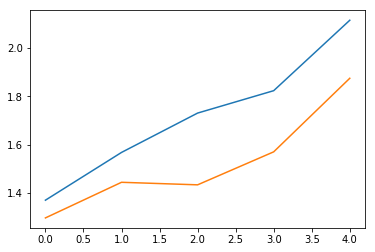

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot( 'year', 'ourReturns', data=returns) # blue
plt.plot( 'year', 'Market', data=returns) # orange
plt.show()

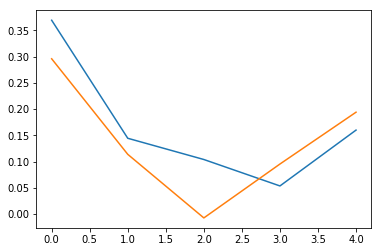

In [140]:
plt.plot( 'year', 'ourYearlyReturn', data=returns) # blue
plt.plot( 'year', 'yearlyMarketReturn', data=returns) # orange
plt.show()

# Second & Third Trading Strategies - Predict Under/Overperformance using KNN and Logistic Models

In [22]:
summaryStatistics = allData.describe().transpose()
summaryStatisticsDataframe = pd.DataFrame(summaryStatistics.transpose())
summaryStatisticsDataframe

,MarketCapitalizationFY2011,CashEquivalentsFY2011,PreferredOtherFY2011,TotalDebtFY2011,NetDebttoEBITDAFY2011,EnterpriseValueFY2011,EnterpriseValuetoRevenueFY2011,EnterpriseValuetoEBITDAFY2011,EnterpriseValuetoFreeCashFlowFY2011,RevenueAdjFY2011,...,TotalDebttoTotalEquityFY2017,PricetoSalesRatioFY2017,RDExpendituretoNetSalesFY2017,TotalDebtstoTotalCapitalFY2017,Trailing12MEBITMarginFY2017,InterestExpenseFY2017,EBITtoInterestExpenseFY2017,PriceEarningsRatioPEFY2017,TotalInvestedCapitalFY2017,EarningsYieldFY2017
count,218.000000,220.000000,219.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,218.000000,220.000000,220.000000,220.000000,220.000000,220.000000,218.000000,220.000000,220.000000
mean,26897.433139,4261.963759,-18.728953,6990.927423,2.686926,31177.188222,2.997955,13.050005,30.925265,22125.314855,...,134.686474,3.472489,0.041345,46.102156,0.177578,432.943282,24.858702,26.002062,30146.246077,0.047007
std,48169.101951,13432.263527,6593.451840,11840.046634,17.346927,51923.004065,3.546511,37.761135,69.557791,47719.798919,...,251.726931,2.848094,0.077318,18.275257,0.117502,745.120847,132.112277,16.805567,54660.105587,0.020716
min,1433.969900,0.342000,-73534.000000,0.000000,-5.568781,872.144900,0.110643,1.795575,0.000000,329.830000,...,2.602589,0.272463,0.000000,2.536572,-0.391221,0.503000,-40.791123,5.837442,1624.691000,0.000000
25%,5637.263850,298.550000,0.000000,1048.363000,-0.331642,7369.400975,1.128301,6.967516,11.065134,3236.384250,...,52.831771,1.494810,0.000000,34.568153,0.109687,91.211750,4.193799,18.181971,7129.425000,0.035422
50%,10651.349550,910.722000,10.000000,3121.615000,1.278116,13465.575400,2.068105,8.852121,15.392343,7515.600000,...,80.610561,2.501125,0.000000,44.632091,0.158079,206.500000,7.839046,22.384251,13356.702000,0.044541
75%,22815.065275,2683.597000,153.950000,7727.214250,2.916209,26705.920350,2.834006,11.555096,23.723878,18301.750000,...,130.334423,4.701654,0.042701,56.584862,0.224413,484.881000,15.604434,27.908186,26771.500000,0.054759
max,401253.840000,162471.000000,49938.000000,99689.000000,255.058891,411970.840000,17.138927,561.672513,805.129817,433526.000000,...,2698.300971,13.597428,0.454895,96.426403,0.533306,6300.000000,1922.025845,143.797264,511085.000000,0.171308


In [23]:
# Re-examine values

cols2017SummaryData = [col for col in summaryStatisticsDataframe.columns if '2017' in col]
cols2016SummaryData = [col for col in summaryStatisticsDataframe.columns if '2016' in col]
cols2015SummaryData = [col for col in summaryStatisticsDataframe.columns if '2015' in col]
cols2014SummaryData = [col for col in summaryStatisticsDataframe.columns if '2014' in col]
cols2013SummaryData = [col for col in summaryStatisticsDataframe.columns if '2013' in col]
cols2012SummaryData = [col for col in summaryStatisticsDataframe.columns if '2012' in col]

data2012SummaryData = summaryStatisticsDataframe[cols2012SummaryData]
data2013SummaryData = summaryStatisticsDataframe[cols2013SummaryData]
data2014SummaryData = summaryStatisticsDataframe[cols2014SummaryData]
data2015SummaryData = summaryStatisticsDataframe[cols2015SummaryData]
data2016SummaryData = summaryStatisticsDataframe[cols2016SummaryData]
data2017SummaryData = summaryStatisticsDataframe[cols2017SummaryData]

In [24]:
data2012SummaryData = data2012SummaryData.convert_objects(convert_numeric=True)
data2013SummaryData = data2013SummaryData.convert_objects(convert_numeric=True)
data2014SummaryData = data2014SummaryData.convert_objects(convert_numeric=True)
data2015SummaryData = data2015SummaryData.convert_objects(convert_numeric=True)
data2016SummaryData = data2016SummaryData.convert_objects(convert_numeric=True)
data2017SummaryData = data2017SummaryData.convert_objects(convert_numeric=True)

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel 

In [25]:
data2017SummaryData

,MarketCapitalizationFY2017,MarketCapitalizationGrowthYoYFY2017,SP500GrowthYoYFY2017,RelativePerformancetoSP500YoYFY2017,CashEquivalentsFY2017,CashEquivalentsGrowthYoYFY2017,PreferredOtherFY2017,PreferredOtherGrowthYoYFY2017,TotalDebtFY2017,TotalDebtGrowthYoYFY2017,...,TotalDebttoTotalEquityFY2017,PricetoSalesRatioFY2017,RDExpendituretoNetSalesFY2017,TotalDebtstoTotalCapitalFY2017,Trailing12MEBITMarginFY2017,InterestExpenseFY2017,EBITtoInterestExpenseFY2017,PriceEarningsRatioPEFY2017,TotalInvestedCapitalFY2017,EarningsYieldFY2017
count,218.000000,220.000000,2.200000e+02,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,218.000000,220.000000,220.000000,220.000000,220.000000,220.000000,218.000000,220.000000,220.000000
mean,49597.147486,0.192531,1.942000e-01,-0.001669,6920.449205,0.622524,-792.525592,0.562481,12959.649755,0.181648,...,134.686474,3.472489,0.041345,46.102156,0.177578,432.943282,24.858702,26.002062,30146.246077,0.047007
std,80355.106632,0.348508,1.112755e-16,0.348508,26227.436498,3.082464,10329.173551,7.706965,22039.743026,0.526887,...,251.726931,2.848094,0.077318,18.275257,0.117502,745.120847,132.112277,16.805567,54660.105587,0.020716
min,5490.465900,-0.409042,1.942000e-01,-0.603242,0.000000,-1.000000,-125791.000000,-6.190476,127.000000,-0.663325,...,2.602589,0.272463,0.000000,2.536572,-0.391221,0.503000,-40.791123,5.837442,1624.691000,0.000000
25%,12896.200475,-0.008790,1.942000e-01,-0.202990,320.200000,-0.174680,0.000000,-0.019316,2917.958250,-0.004923,...,52.831771,1.494810,0.000000,34.568153,0.109687,91.211750,4.193799,18.181971,7129.425000,0.035422
50%,22836.752250,0.144395,1.942000e-01,-0.049805,924.951500,0.092577,10.042000,0.000000,5904.280000,0.063483,...,80.610561,2.501125,0.000000,44.632091,0.158079,206.500000,7.839046,22.384251,13356.702000,0.044541
75%,49458.047525,0.318416,1.942000e-01,0.124216,3707.300000,0.333882,221.112250,0.055169,12920.000000,0.175905,...,130.334423,4.701654,0.042701,56.584862,0.224413,484.881000,15.604434,27.908186,26771.500000,0.054759
max,729274.628200,3.141646,1.942000e-01,2.947446,318968.000000,27.905312,7795.000000,113.060606,164346.000000,4.388189,...,2698.300971,13.597428,0.454895,96.426403,0.533306,6300.000000,1922.025845,143.797264,511085.000000,0.171308


In [26]:
def RelativePerformanceToNumeric(x):
    if x > 0.0:
        return 1
    else:
        return 0

In [27]:
# run KNN

listAllData = [data2012, data2013, data2014, data2015, data2016, data2017]
listAllBMSS = [beatMarketStatSig2012,
beatMarketStatSig2013,
beatMarketStatSig2014,
beatMarketStatSig2015,
beatMarketStatSig2016,
beatMarketStatSig2017]
listAllLMSS = [
loseMarketStatSig2012,
loseMarketStatSig2013,
loseMarketStatSig2014,
loseMarketStatSig2015,
loseMarketStatSig2016,
loseMarketStatSig2017]

totalMarketReturns = []  
totalOurReturns =[]
    
for i in listAllData:    
    i['binaryPerformance'] = i['RelativePerformancetoSP500YoY'].apply(RelativePerformanceToNumeric)

In [28]:
data2012 = data2012.dropna()
data2013 = data2013.dropna()
data2014 = data2014.dropna()
data2015 = data2015.dropna()
data2016 = data2016.dropna()
data2017 = data2017.dropna()

In [29]:
def seeCorrelation(dataThisYear, dataNextYear):    
    dataCorrelations = dataThisYear.corr().unstack().sort_values()#.drop_duplicates()
    dataCorrelationsBinaryPerformance = dataCorrelations['binaryPerformance'] 
    dataCorrelationsBinaryPerformance = pd.DataFrame(dataCorrelationsBinaryPerformance)
    dataCorrelationsBinaryPerformance['Items'] = dataCorrelationsBinaryPerformance.index
    dataCorrelationsBinaryPerformance.columns = ['Correlation', 'Items']
    dataCorrelationsBinaryPerformance = dataCorrelationsBinaryPerformance[~dataCorrelationsBinaryPerformance['Items'].str.contains("MarketCapitalization")]
    dataCorrelationsBinaryPerformance = dataCorrelationsBinaryPerformance[~dataCorrelationsBinaryPerformance['Items'].str.contains("SP500GrowthYoY")]
    dataCorrelationsBinaryPerformance = dataCorrelationsBinaryPerformance[~dataCorrelationsBinaryPerformance['Items'].str.contains("EnterpriseValueFY")]
    dataCorrelationsBinaryPerformance = dataCorrelationsBinaryPerformance[~dataCorrelationsBinaryPerformance['Items'].str.contains("EnterpriseValueGrowthYoY")]
    dataCorrelationsBinaryPerformance = dataCorrelationsBinaryPerformance[~dataCorrelationsBinaryPerformance['Items'].str.contains("RelativePerformancetoSP500")]
    dataCorrelationsBinaryPerformance = dataCorrelationsBinaryPerformance[~dataCorrelationsBinaryPerformance['Items'].str.contains("binaryPerformance")]
    print(dataCorrelationsBinaryPerformance)
    bestData = []    
    bestData.append(dataCorrelationsBinaryPerformance.Items.iloc[len(dataCorrelationsBinaryPerformance) - 1])
    bestData.append(dataCorrelationsBinaryPerformance.Items.iloc[len(dataCorrelationsBinaryPerformance) - 2])
    bestFeatures = dataThisYear[bestData]    
    #print(bestFeatures) # this will also have to include up/down values for the year to work in this case. 
    #showBestFeatures = pd.DataFrame(bestFeatures)
    #showBestFeatures.plot(kind='scatter')
    indexThisYear = bestFeatures.index.values.tolist()     
    #indexThisYear = list(bestFeatures.index)
    indexNextYear = dataNextYear.index.values.tolist()
    #indexNextYear = list(dataNextYear.index)
    differencesIndexes = set(indexNextYear) - set(indexThisYear)
    my_list = []
    for value in differencesIndexes:
        my_list.append(value)
    #print(my_list) 
    dataNextYear = dataNextYear.drop(dataNextYear.index[my_list])    
    dataNextYear = dataNextYear['binaryPerformance']
    return bestFeatures, dataNextYear

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix

def recallCalc(matrix):
    tp = matrix[1][1] 
    fn = matrix[0][1] 
    return(np.round(tp/(tp+fn), 5))

def precisionCalc(matrix): 
    tp = matrix[1][1] 
    fp = matrix[0][0] 
    return(np.round(tp/(tp+fp), 5))

def fScore(precision, recall):
    return(np.round(2 * (precision * recall) / (precision + recall), 5))

def falsePositiveRate_(matrix):
    fp = matrix[0][1] 
    tn = matrix[0][0] 
    return(np.round(fp/(fp+tn), 5))

def truePositiveRate_(matrix):
    tp = matrix[1][1] 
    fn = matrix[1][0] 
    return(np.round(tp/(tp+fn), 5))

def accuracy(actual, pred):
    return(np.round(  (pred == actual).sum()/len(actual)  , 5))

def thresholdPredData(threshold, pred):
    predMal = pred
    for i in range(len(predMal)):
        if((threshold == 1.0) & (predMal[i].astype(float) == 1.0)):
            predMal[i] = 0.0
        elif((threshold == 0.0) & (predMal[i].astype(float) == 0.0)):
            predMal[i] = 1.0
        elif(predMal[i] > threshold):
            predMal[i] = 1
        else:
            predMal[i] = 0
    return(predMal.astype(int))

In [31]:
from sklearn.neighbors import KNeighborsClassifier
def predictions(train_features, test_features, train_outcome, test_outcome): 
    w, h = 5, 1;
    KNNresults = [[0 for x in range(w)] for y in range(h)] 
    KNNdatas = pd.DataFrame(KNNresults)
    KNNdatas.columns = ['a', 'b', 'c', 'd', 'e']

    for K in range(0, 25):
        K = K+1
        # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        # ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        for weights in ['uniform', 'distance']:
            # ‘ball_tree’ will use BallTree, ‘kd_tree’ will use KDTree, ‘brute’ will use a brute-force search.
            for algo in ['ball_tree', 'kd_tree', 'brute']:
            # manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
                for powerDistance in [1,2]:
                    model = KNeighborsClassifier(n_neighbors = K, weights=weights, algorithm=algo, p=powerDistance)
                    model.fit(train_features, train_outcome)  #fit the model
                    pred=model.predict(test_features) #make prediction on test set
                    accuracy = accuracy_score(test_outcome, pred)
                    list=[[K, weights, algo, powerDistance, accuracy]]
                    KNNdatas = KNNdatas.append(pd.DataFrame(list))      
    KNNdatas.drop(KNNdatas.iloc[:, 1:5], inplace=True, axis=1)
    KNNdatas.drop(["a"], axis = 1, inplace = True)
    KNNdatas = KNNdatas.reset_index(drop=True)
    KNNdatas = KNNdatas.drop(KNNdatas.index[0])
    KNNdatas.columns = ['K', 'weights', 'algo', 'powerDistance', 'accuracy'] 
    #print(KNNdatas['accuracy'].max())
    #print(KNNdatas['accuracy'].argmax())
    bestData = KNNdatas.iloc[KNNdatas['accuracy'].argmax() - 1]
    #print(bestData)
    from sklearn.metrics import confusion_matrix
    model = KNeighborsClassifier(n_neighbors = int(bestData.K), weights=bestData.weights, algorithm=bestData.algo, p=bestData.powerDistance)
    model.fit(train_features, train_outcome)  #fit the model
    # This is where we could do the threshold calculation
    analytics(model.fit(train_features, train_outcome), test_features, test_outcome)
    #gridshow(model, train_features, train_outcome, test_features, test_outcome, nGrid=100)
    pred=model.predict(test_features) #make prediction on test set
    #print(pred)
    accuracy = accuracy_score(test_outcome, pred)
    #print(accuracy)
    confusion_matrix(test_outcome, pred)
    return pred

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def logisticPredictions(train_features, test_features, train_outcome, test_outcome): 
    w, h = 2, 1;
    logisticresults = [[0 for x in range(w)] for y in range(h)] 
    logisticData = pd.DataFrame(logisticresults)
    logisticData.columns = ['Solver', 'Accuracy']
    for solver in ['newton-cg', 'lbfgs', 'sag', 'saga']: # 'liblinear',
        clf = LogisticRegression(random_state=0, solver=solver, multi_class='multinomial').fit(train_features, train_outcome)
        pred = clf.predict(test_features)
        accuracy = accuracy_score(test_outcome, pred)
        list=[[solver, accuracy]]
        logisticData = logisticData.append(pd.DataFrame(list))    
    logisticData.drop(logisticData.iloc[:, 1:2], inplace=True, axis=1)
    logisticData.drop(["Solver"], axis = 1, inplace = True)
    logisticData = logisticData.reset_index(drop=True)
    logisticData = logisticData.drop(logisticData.index[0])
    logisticData.columns = ['Solver', 'Accuracy'] 
    print(logisticData)
    bestData = logisticData.iloc[logisticData['Accuracy'].argmax() - 1]
    #print(bestData)
    from sklearn.metrics import confusion_matrix
    model = LogisticRegression(random_state=0, solver=bestData.Solver, multi_class='multinomial')
    model.fit(train_features, train_outcome)  #fit the model
    # This is where we could do the threshold calculation
    analytics(model.fit(train_features, train_outcome), test_features, test_outcome)
    #gridshow(model, train_features, train_outcome, test_features, test_outcome, nGrid=100)
    pred=model.predict(test_features) #make prediction on test set
    #print(pred)
    accuracy = accuracy_score(test_outcome, pred)
    print(accuracy)
    confusion_matrix(test_outcome, pred)
    return pred

In [33]:
from sklearn.svm import SVC
def svcPredictions(train_features, test_features, train_outcome, test_outcome): 
    w, h = 2, 1;
    svcresults = [[0 for x in range(w)] for y in range(h)] 
    svcData = pd.DataFrame(svcresults)
    svcData.columns = ['Kernel', 'Accuracy']
    for kernel in ['linear', 'poly']:#, 'poly', 'rbf', 'sigmoid', 'precomputed']: # 'liblinear',
        svmModel = SVC(kernel = kernel, probability=True)
        svmModel.fit(X = train_features, y = train_outcome)
        pred = svmModel.predict(test_features)
        accuracy = accuracy_score(test_outcome, pred)
        list=[[kernel, accuracy]]
        svcData = svcData.append(pd.DataFrame(list))    
    svcData.drop(svcData.iloc[:, 1:2], inplace=True, axis=1)
    svcData.drop(["Kernel"], axis = 1, inplace = True)
    svcData = svcData.reset_index(drop=True)
    svcData = svcData.drop(svcData.index[0])
    svcData.columns = ['Kernel', 'Accuracy'] 
    print(svcData)
    bestData = svcData.iloc[svcData['Accuracy'].argmax() - 1]
    #print(bestData)
    from sklearn.metrics import confusion_matrix
    model = SVC(kernel = bestData.Kernel, probability=True)
    model.fit(train_features, train_outcome)  #fit the model
    # This is where we could do the threshold calculation
    analytics(model.fit(train_features, train_outcome), test_features, test_outcome)
    #gridshow(model, train_features, train_outcome, test_features, test_outcome, nGrid=100)
    pred=model.predict(test_features) #make prediction on test set
    #print(pred)
    accuracy = accuracy_score(test_outcome, pred)
    print(accuracy)
    confusion_matrix(test_outcome, pred)
    return pred

In [34]:
def outcomes(short, long, nextYear): 
    longKNNindex = long.index.values.tolist()
    checkMetricBeat = []
    for k in longKNNindex:
        values = nextYear.loc[k]
        checkMetricBeat.append(values[1])
    metricNextYearReturn = pd.DataFrame(checkMetricBeat, columns = ['Returns'])
    return float(nextYear['SP500GrowthYoY'].mean()), float(metricNextYearReturn.mean()) 

In [35]:
def analytics(fitModel, xv_test, yv_test):
    predMal = fitModel.predict_proba(xv_test)[:, 1]
    actual = yv_test
    w, h = 5, 11;
    additionalData = [[0 for x in range(w)] for y in range(h)] 
    thresholds = np.round(np.linspace(0, 1, 11),6)
    fpr = []
    tpr = []
    for i in thresholds:
        predMal = fitModel.predict_proba(xv_test)[:, 1]
        pred = thresholdPredData(i, predMal)
        c_matrix = confusion_matrix(actual, pred)
        tpr.append(truePositiveRate_(c_matrix))
        fpr.append(falsePositiveRate_(c_matrix))
        additionalData[int(i * 10)][0] = i
        additionalData[int(i * 10)][1] = precisionCalc(c_matrix)
        additionalData[int(i * 10)][2] = recallCalc(c_matrix)
        additionalData[int(i * 10)][3] = accuracy(actual, pred)
        additionalData[int(i * 10)][4] = fScore(precisionCalc(c_matrix), recallCalc(c_matrix))
        print(c_matrix)
    additionalData = pd.DataFrame(data=additionalData, columns=['Threshold', 'Precision', 'Recall', 'Accuracy', 'fScore'])
    print(additionalData)
    df = pd.DataFrame({'threshold':thresholds, 'fpr':fpr, 'tpr':tpr})
    plt.plot(df.fpr, df.tpr)
    plt.plot([0, 90], [0, 90], '-')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.show()
    print(df)

                                     Correlation  \
EarningsYieldFY2012                    -0.308797   
EBITDAAdjFY2012                        -0.236599   
GrossProfitAdjFY2012                   -0.232352   
TotalInvestedCapitalFY2012             -0.218518   
CashfromOperationsFY2012               -0.212454   
FreeCashFlowFY2012                     -0.183436   
NetIncomeAdjFY2012                     -0.179423   
InterestExpenseFY2012                  -0.166091   
RevenueAdjFY2012                       -0.165456   
WACCEconomicValueAddedFY2012           -0.154677   
TotalDebtFY2012                        -0.149435   
EPSAdjFY2012                           -0.101580   
TotalDebttoTotalEquityFY2012           -0.095243   
CashEquivalentsFY2012                  -0.092020   
TotalDebtstoTotalCapitalFY2012         -0.085024   
EBITtoInterestExpenseFY2012            -0.083336   
EBITDAMarginFY2012                     -0.055658   
PreferredOtherFY2012                   -0.047913   
PreferredOth

C:\Users\ossi\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\ossi\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 'argmax' is deprecated, use 'idxmax' instea

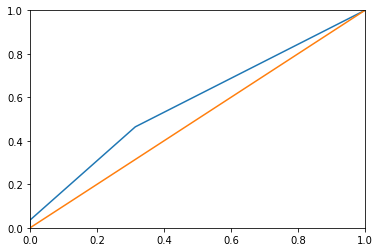

    threshold      fpr      tpr
0         0.0  1.00000  1.00000
1         0.1  1.00000  1.00000
2         0.2  1.00000  1.00000
3         0.3  1.00000  1.00000
4         0.4  1.00000  1.00000
5         0.5  0.31429  0.46429
6         0.6  0.00000  0.03571
7         0.7  0.00000  0.00000
8         0.8  0.00000  0.00000
9         0.9  0.00000  0.00000
10        1.0  0.00000  0.00000
0.5873015873015873
                                     Correlation  \
EarningsYieldFY2013                    -0.211402   
TotalDebtFY2013                        -0.200543   
TotalInvestedCapitalFY2013             -0.179067   
GrossProfitAdjFY2013                   -0.173571   
TotalDebttoTotalEquityFY2013           -0.168120   
EBITDAAdjFY2013                        -0.167788   
GrossMarginFY2013                      -0.162702   
CashfromOperationsFY2013               -0.162285   
EBITDAMarginFY2013                     -0.161952   
InterestExpenseFY2013                  -0.151479   
NetIncomeAdjFY2013       

C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


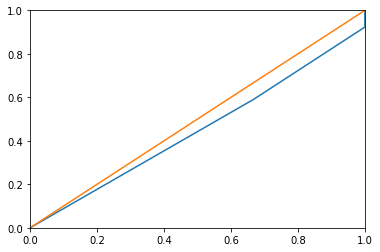

    threshold      fpr      tpr
0         0.0  1.00000  1.00000
1         0.1  1.00000  1.00000
2         0.2  1.00000  1.00000
3         0.3  1.00000  1.00000
4         0.4  1.00000  0.92308
5         0.5  0.66667  0.58974
6         0.6  0.00000  0.00000
7         0.7  0.00000  0.00000
8         0.8  0.00000  0.00000
9         0.9  0.00000  0.00000
10        1.0  0.00000  0.00000
0.49206349206349204
                                     Correlation  \
EarningsYieldFY2014                    -0.228793   
RevenueAdjFY2014                       -0.198131   
WeightedAverageCostofCapFY2014         -0.148937   
SalesperEmployeeFY2014                 -0.147268   
TotalInvestedCapitalFY2014             -0.138809   
NetIncomeAdjFY2014                     -0.133950   
EBITDAAdjFY2014                        -0.124848   
CashfromOperationsFY2014               -0.124213   
FreeCashFlowFY2014                     -0.120543   
EBITtoInterestExpenseFY2014            -0.114847   
TotalDebtFY2014         

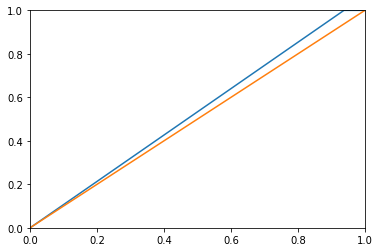

    threshold     fpr  tpr
0         0.0  1.0000  1.0
1         0.1  1.0000  1.0
2         0.2  1.0000  1.0
3         0.3  1.0000  1.0
4         0.4  1.0000  1.0
5         0.5  0.9375  1.0
6         0.6  0.0000  0.0
7         0.7  0.0000  0.0
8         0.8  0.0000  0.0
9         0.9  0.0000  0.0
10        1.0  0.0000  0.0
0.5238095238095238
                                     Correlation  \
EarningsYieldFY2015                    -0.394755   
NetDebttoEBITDAFY2015                  -0.160650   
TotalDebttoTotalEquityFY2015           -0.153067   
TotalDebtstoTotalCapitalFY2015         -0.120042   
TotalDebtFY2015                        -0.091437   
EnterpriseValuetoFreeCashFlowFY2015    -0.077784   
SalesperEmployeeFY2015                 -0.067630   
NetIncomeGrowthYoYFY2015               -0.059844   
InterestExpenseFY2015                  -0.059309   
PreferredOtherGrowthYoYFY2015          -0.050777   
EBITtoInterestExpenseFY2015            -0.049081   
CashfromOperationsGrowthYoYFY2015

C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


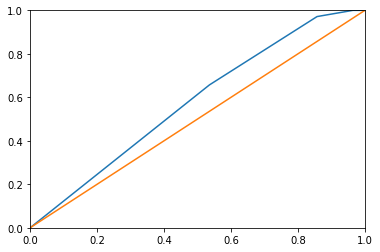

    threshold      fpr      tpr
0         0.0  1.00000  1.00000
1         0.1  1.00000  1.00000
2         0.2  1.00000  1.00000
3         0.3  0.96429  1.00000
4         0.4  0.85714  0.97143
5         0.5  0.53571  0.65714
6         0.6  0.00000  0.00000
7         0.7  0.00000  0.00000
8         0.8  0.00000  0.00000
9         0.9  0.00000  0.00000
10        1.0  0.00000  0.00000
0.5714285714285714
                                     Correlation  \
EarningsYieldFY2016                    -0.217759   
CashRatioFY2016                        -0.171622   
RDExpendituretoNetSalesFY2016          -0.170811   
GrossMarginFY2016                      -0.165160   
CurrentRatioFY2016                     -0.162311   
ReturnonAssetsFY2016                   -0.147452   
QuickRatioFY2016                       -0.139280   
EPSGrowthYoYFY2016                     -0.137104   
ReturnonInvestedCapitalFY2016          -0.122808   
AltmansZScoreFY2016                    -0.120322   
NetIncomeMarginFY2016    

C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


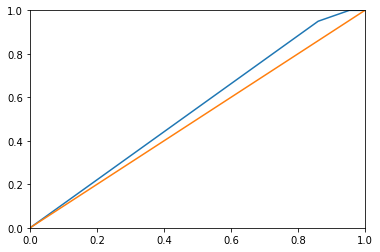

    threshold      fpr   tpr
0         0.0  1.00000  1.00
1         0.1  0.97674  1.00
2         0.2  0.97674  1.00
3         0.3  0.95349  1.00
4         0.4  0.86047  0.95
5         0.5  0.00000  0.00
6         0.6  0.00000  0.00
7         0.7  0.00000  0.00
8         0.8  0.00000  0.00
9         0.9  0.00000  0.00
10        1.0  0.00000  0.00
0.6825396825396826


,ourReturns,year,ourYearlyReturn,Market,yearlyMarketReturn,ReturnDifference,YearlyDifference
0,1.333150,0,0.333150,1.296000,0.2960,0.037150,0.037150
1,1.563136,1,0.172513,1.443614,0.1139,0.119522,0.058613
2,1.637825,2,0.047781,1.433076,-0.0073,0.204749,0.055081
3,1.831866,3,0.118475,1.569791,0.0954,0.262075,0.023075


In [36]:
# Logistic 

totalMarketReturns = []  
totalOurReturns =[]

from sklearn.model_selection import train_test_split

for i in range(0,len(listAllData)):    
    if i != 5:
        correls, NYR = seeCorrelation(listAllData[i], listAllData[i + 1])
        train_features, test_features, train_outcome, test_outcome = train_test_split(
            correls,
            NYR, # next years value 
            test_size = .33, 
            random_state = 7
        )
        predictionsDataframe = pd.DataFrame(test_outcome)
        predictionsDataframe['logisticPredictions'] = logisticPredictions(train_features, test_features, train_outcome, test_outcome)
        long = predictionsDataframe[predictionsDataframe['logisticPredictions'] == 1]
        short = predictionsDataframe[predictionsDataframe['logisticPredictions'] == 0]
        marketReturn, ourOutperformReturn = outcomes(short, long, listAllData[i + 1])
        # Data output error for 2016/2017
        if i != 4:
            totalMarketReturns.append(marketReturn)
            totalOurReturns.append(ourOutperformReturn)        
returns = returnAnalysis(totalMarketReturns, totalOurReturns)
returns

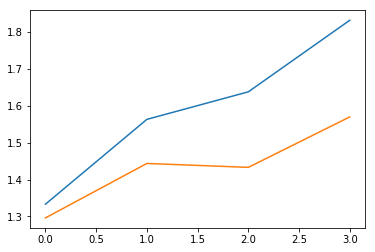

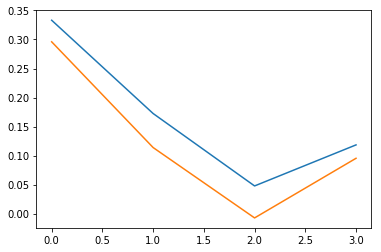

In [37]:
plt.plot( 'year', 'ourReturns', data=returns) # blue
plt.plot( 'year', 'Market', data=returns) # orange
plt.show()
plt.plot( 'year', 'ourYearlyReturn', data=returns) # blue
plt.plot( 'year', 'yearlyMarketReturn', data=returns) # orange
plt.show()

C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\grid_search.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, Sized
C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Use

                                     Correlation  \
EarningsYieldFY2012                    -0.308797   
EBITDAAdjFY2012                        -0.236599   
GrossProfitAdjFY2012                   -0.232352   
TotalInvestedCapitalFY2012             -0.218518   
CashfromOperationsFY2012               -0.212454   
FreeCashFlowFY2012                     -0.183436   
NetIncomeAdjFY2012                     -0.179423   
InterestExpenseFY2012                  -0.166091   
RevenueAdjFY2012                       -0.165456   
WACCEconomicValueAddedFY2012           -0.154677   
TotalDebtFY2012                        -0.149435   
EPSAdjFY2012                           -0.101580   
TotalDebttoTotalEquityFY2012           -0.095243   
CashEquivalentsFY2012                  -0.092020   
TotalDebtstoTotalCapitalFY2012         -0.085024   
EBITtoInterestExpenseFY2012            -0.083336   
EBITDAMarginFY2012                     -0.055658   
PreferredOtherFY2012                   -0.047913   
PreferredOth

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


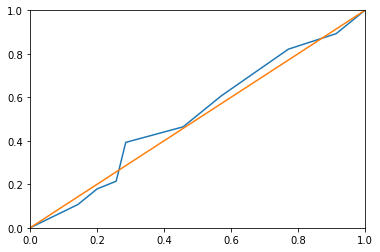

    threshold      fpr      tpr
0         0.0  1.00000  1.00000
1         0.1  0.91429  0.89286
2         0.2  0.77143  0.82143
3         0.3  0.57143  0.60714
4         0.4  0.45714  0.46429
5         0.5  0.28571  0.39286
6         0.6  0.28571  0.39286
7         0.7  0.25714  0.21429
8         0.8  0.20000  0.17857
9         0.9  0.14286  0.10714
10        1.0  0.00000  0.00000
                                     Correlation  \
EarningsYieldFY2013                    -0.211402   
TotalDebtFY2013                        -0.200543   
TotalInvestedCapitalFY2013             -0.179067   
GrossProfitAdjFY2013                   -0.173571   
TotalDebttoTotalEquityFY2013           -0.168120   
EBITDAAdjFY2013                        -0.167788   
GrossMarginFY2013                      -0.162702   
CashfromOperationsFY2013               -0.162285   
EBITDAMarginFY2013                     -0.161952   
InterestExpenseFY2013                  -0.151479   
NetIncomeAdjFY2013                     -0.14

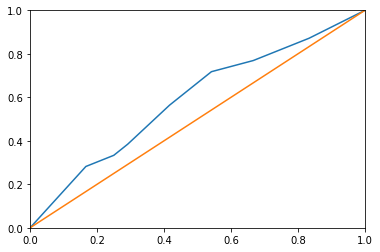

    threshold      fpr      tpr
0         0.0  1.00000  1.00000
1         0.1  0.83333  0.87179
2         0.2  0.83333  0.87179
3         0.3  0.75000  0.82051
4         0.4  0.66667  0.76923
5         0.5  0.54167  0.71795
6         0.6  0.41667  0.56410
7         0.7  0.29167  0.38462
8         0.8  0.25000  0.33333
9         0.9  0.16667  0.28205
10        1.0  0.00000  0.00000
                                     Correlation  \
EarningsYieldFY2014                    -0.228793   
RevenueAdjFY2014                       -0.198131   
WeightedAverageCostofCapFY2014         -0.148937   
SalesperEmployeeFY2014                 -0.147268   
TotalInvestedCapitalFY2014             -0.138809   
NetIncomeAdjFY2014                     -0.133950   
EBITDAAdjFY2014                        -0.124848   
CashfromOperationsFY2014               -0.124213   
FreeCashFlowFY2014                     -0.120543   
EBITtoInterestExpenseFY2014            -0.114847   
TotalDebtFY2014                        -0.11

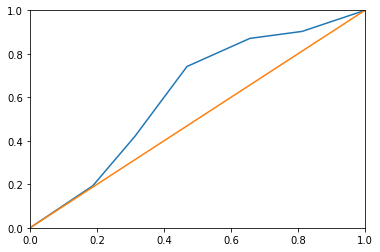

    threshold      fpr      tpr
0         0.0  1.00000  1.00000
1         0.1  1.00000  1.00000
2         0.2  0.93750  0.96774
3         0.3  0.81250  0.90323
4         0.4  0.65625  0.87097
5         0.5  0.46875  0.74194
6         0.6  0.31250  0.41935
7         0.7  0.18750  0.19355
8         0.8  0.06250  0.06452
9         0.9  0.00000  0.00000
10        1.0  0.00000  0.00000
                                     Correlation  \
EarningsYieldFY2015                    -0.394755   
NetDebttoEBITDAFY2015                  -0.160650   
TotalDebttoTotalEquityFY2015           -0.153067   
TotalDebtstoTotalCapitalFY2015         -0.120042   
TotalDebtFY2015                        -0.091437   
EnterpriseValuetoFreeCashFlowFY2015    -0.077784   
SalesperEmployeeFY2015                 -0.067630   
NetIncomeGrowthYoYFY2015               -0.059844   
InterestExpenseFY2015                  -0.059309   
PreferredOtherGrowthYoYFY2015          -0.050777   
EBITtoInterestExpenseFY2015            -0.04

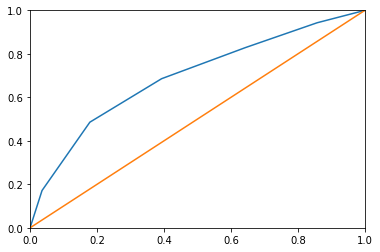

    threshold      fpr      tpr
0         0.0  1.00000  1.00000
1         0.1  1.00000  1.00000
2         0.2  0.85714  0.94286
3         0.3  0.64286  0.82857
4         0.4  0.39286  0.68571
5         0.5  0.17857  0.48571
6         0.6  0.03571  0.17143
7         0.7  0.00000  0.00000
8         0.8  0.00000  0.00000
9         0.9  0.00000  0.00000
10        1.0  0.00000  0.00000
                                     Correlation  \
EarningsYieldFY2016                    -0.217759   
CashRatioFY2016                        -0.171622   
RDExpendituretoNetSalesFY2016          -0.170811   
GrossMarginFY2016                      -0.165160   
CurrentRatioFY2016                     -0.162311   
ReturnonAssetsFY2016                   -0.147452   
QuickRatioFY2016                       -0.139280   
EPSGrowthYoYFY2016                     -0.137104   
ReturnonInvestedCapitalFY2016          -0.122808   
AltmansZScoreFY2016                    -0.120322   
NetIncomeMarginFY2016                  -0.11

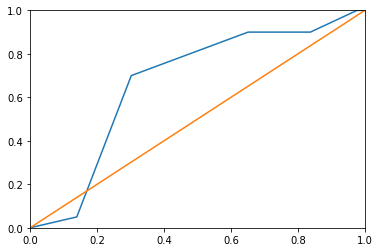

    threshold      fpr   tpr
0         0.0  1.00000  1.00
1         0.1  0.97674  1.00
2         0.2  0.83721  0.90
3         0.3  0.83721  0.90
4         0.4  0.65116  0.90
5         0.5  0.30233  0.70
6         0.6  0.30233  0.70
7         0.7  0.13953  0.05
8         0.8  0.13953  0.05
9         0.9  0.00000  0.00
10        1.0  0.00000  0.00


,ourReturns,year,ourYearlyReturn,Market,yearlyMarketReturn,ReturnDifference,YearlyDifference
0,1.300832,0,0.300832,1.296000,0.2960,0.004832,0.004832
1,1.553551,1,0.194275,1.443614,0.1139,0.109936,0.080375
2,1.706806,2,0.098649,1.433076,-0.0073,0.273730,0.105949
3,1.986275,3,0.163738,1.569791,0.0954,0.416483,0.068338
4,2.450301,4,0.233616,1.874645,0.1942,0.575656,0.039416


In [38]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix

totalMarketReturns = []  
totalOurReturns =[]

for i in range(0,len(listAllData)):    
    if i != 5:
        correls, NYR = seeCorrelation(listAllData[i], listAllData[i + 1])
        train_features, test_features, train_outcome, test_outcome = train_test_split(
            correls,
            NYR, # next years value 
            test_size = .33, 
            random_state = 7
        )
        predictionsDataframe = pd.DataFrame(test_outcome)
        predictionsDataframe['predictions'] = predictions(train_features, test_features, train_outcome, test_outcome)
        long = predictionsDataframe[predictionsDataframe['predictions'] == 1]
        short = predictionsDataframe[predictionsDataframe['predictions'] == 0]
        marketReturn, ourOutperformReturn = outcomes(short, long, listAllData[i + 1])
        totalMarketReturns.append(marketReturn)
        totalOurReturns.append(ourOutperformReturn)
returns = returnAnalysis(totalMarketReturns, totalOurReturns)
returns

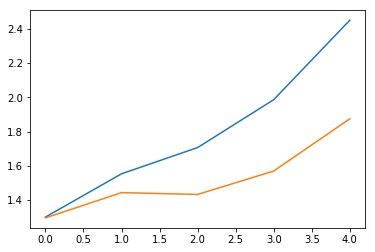

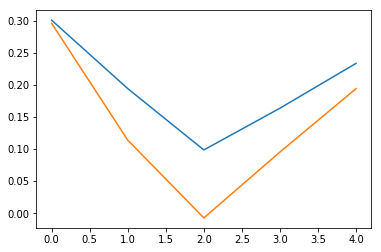

In [39]:
plt.plot( 'year', 'ourReturns', data=returns) # blue
plt.plot( 'year', 'Market', data=returns) # orange
plt.show()
plt.plot( 'year', 'ourYearlyReturn', data=returns) # blue
plt.plot( 'year', 'yearlyMarketReturn', data=returns) # orange
plt.show()

In [115]:
#totalMarketReturns = []  
#totalOurReturns =[]

#for i in range(0,len(listAllData)):    
#    if i != 5:
#        correls, NYR = seeCorrelation(listAllData[i], listAllData[i + 1])
#        train_features, test_features, train_outcome, test_outcome = train_test_split(
#            correls,
#            NYR, # next years value 
#            test_size = .33, 
#            random_state = 7
#        )
#        predictionsDataframe = pd.DataFrame(test_outcome)
#        predictionsDataframe['svcPredictions'] = svcPredictions(train_features, test_features, train_outcome, test_outcome)
#        long = predictionsDataframe[predictionsDataframe['svcPredictions'] == 1]
#        short = predictionsDataframe[predictionsDataframe['svcPredictions'] == 0]
#        marketReturn, ourOutperformReturn = outcomes(short, long, listAllData[i + 1])
#        totalMarketReturns.append(marketReturn)
#        totalOurReturns.append(ourOutperformReturn)
#returns = returnAnalysis(totalMarketReturns, totalOurReturns)
#returns

In [41]:
#plt.plot( 'year', 'ourReturns', data=returns) # blue
#plt.plot( 'year', 'Market', data=returns) # orange
#plt.show()
#plt.plot( 'year', 'ourYearlyReturn', data=returns) # blue
#plt.plot( 'year', 'yearlyMarketReturn', data=returns) # orange
#plt.show()

# Value Investing Strategy - Buy Bottom 10% of S&P by PE Ratio

In [42]:
# Import data
import pandas as pd
allData = pd.read_csv('dataData.csv', encoding='windows-1252')

allData = allData.dropna()
allData = allData.replace('#VALUE!',0)

tickers = allData.loc[:, allData.columns == 'Ticker (all values in $ billions)']

allData = allData.loc[:, allData.columns != 'Ticker (all values in $ billions)']

allData.columns = allData.columns.str.strip()
allData.columns = allData.columns.str.replace(' ', '')
allData.columns = allData.columns.str.replace(',', '')
allData.columns = allData.columns.str.replace('_', '')
allData.columns = allData.columns.str.replace('+', '')
allData.columns = allData.columns.str.replace('-', '')
allData.columns = allData.columns.str.replace('%', '')
allData.columns = allData.columns.str.replace('/', '')
allData.columns = allData.columns.str.replace('&', '')
allData.columns = allData.columns.str.replace('(', '')
allData.columns = allData.columns.str.replace("'", "")
allData.columns = allData.columns.str.replace(')', '')
allData.columns = allData.columns.str.replace('—', '')
allData = allData.convert_objects(convert_numeric=True)

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [43]:
# Get values by year

cols2017 = [col for col in allData.columns if '2017' in col]
cols2016 = [col for col in allData.columns if '2016' in col]
cols2015 = [col for col in allData.columns if '2015' in col]
cols2014 = [col for col in allData.columns if '2014' in col]
cols2013 = [col for col in allData.columns if '2013' in col]
cols2012 = [col for col in allData.columns if '2012' in col]

# Doesn't have change in market cap data and thus makes this analysis much harder
# cols2011 = [col for col in allData.columns if '2011' in col]

# Split data by year

data2012 = allData[cols2012]
data2013 = allData[cols2013]
data2014 = allData[cols2014]
data2015 = allData[cols2015]
data2016 = allData[cols2016]
data2017 = allData[cols2017]

In [44]:
# Make all values numeric

data2012 = data2012.convert_objects(convert_numeric=True)
data2013 = data2013.convert_objects(convert_numeric=True)
data2014 = data2014.convert_objects(convert_numeric=True)
data2015 = data2015.convert_objects(convert_numeric=True)
data2016 = data2016.convert_objects(convert_numeric=True)
data2017 = data2017.convert_objects(convert_numeric=True)

data2012 = data2012.dropna()
data2013 = data2013.dropna()
data2014 = data2014.dropna()
data2015 = data2015.dropna()
data2016 = data2016.dropna()
data2017 = data2017.dropna()

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.t

In [45]:
listAllData = [data2012, data2013, data2014, data2015, data2016, data2017]
years = [2012, 2013, 2014, 2015, 2016, 2017]

totalMarketReturns = []  
totalOurReturns =[]

for i in range(0,len(listAllData)):    
    if i != 5:
        cheapStocksPE = float(listAllData[i].filter(like='PriceEarningsRatioPEFY').quantile(0.1))
        #print(cheapStocksPE)
        cheapStocks = listAllData[i].iloc[:, 56] < cheapStocksPE
        cheapStocks = pd.DataFrame(cheapStocks)
        cheapStocks = cheapStocks[cheapStocks.iloc[:, 0] == True]
        metrics = cheapStocks.index.values
        #print(metrics)
        checkMetricBeat = []
        for k in metrics:
            #print(k)
            values = listAllData[i + 1].loc[k]
            #print(values[1])
            checkMetricBeat.append(values[1])
        checkMetricBeat = pd.DataFrame(checkMetricBeat)
        print("Strategy Performance", years[i], ":", float(checkMetricBeat.mean() - listAllData[i + 1].iloc[:, 2].mean()))
        totalMarketReturns.append(float(listAllData[i + 1].iloc[:, 2].mean()))
        totalOurReturns.append(float(checkMetricBeat.mean()))
returns = returnAnalysis(totalMarketReturns, totalOurReturns)
returns

Strategy Performance 2012 : 0.14818757994736897
Strategy Performance 2013 : 0.03821355363157894
Strategy Performance 2014 : 0.0660590425263158
Strategy Performance 2015 : 0.08172750589473683
Strategy Performance 2016 : 0.1549935160000002


,ourReturns,year,ourYearlyReturn,Market,yearlyMarketReturn,ReturnDifference,YearlyDifference
0,1.444188,0,0.444188,1.296000,0.2960,0.148188,0.148188
1,1.663868,1,0.152114,1.443614,0.1139,0.220254,0.038214
2,1.761635,2,0.058759,1.433076,-0.0073,0.328559,0.066059
3,2.073669,3,0.177128,1.569791,0.0954,0.503878,0.081728
4,2.797781,4,0.349194,1.874645,0.1942,0.923136,0.154994


# Glamour Investing Strategy - Buy Top 10% of S&P by PE Ratio

In [46]:
# Import data
import pandas as pd
allData = pd.read_csv('dataData.csv', encoding='windows-1252')

allData = allData.dropna()
allData = allData.replace('#VALUE!',0)

tickers = allData.loc[:, allData.columns == 'Ticker (all values in $ billions)']

allData = allData.loc[:, allData.columns != 'Ticker (all values in $ billions)']

allData.columns = allData.columns.str.strip()
allData.columns = allData.columns.str.replace(' ', '')
allData.columns = allData.columns.str.replace(',', '')
allData.columns = allData.columns.str.replace('_', '')
allData.columns = allData.columns.str.replace('+', '')
allData.columns = allData.columns.str.replace('-', '')
allData.columns = allData.columns.str.replace('%', '')
allData.columns = allData.columns.str.replace('/', '')
allData.columns = allData.columns.str.replace('&', '')
allData.columns = allData.columns.str.replace('(', '')
allData.columns = allData.columns.str.replace("'", "")
allData.columns = allData.columns.str.replace(')', '')
allData.columns = allData.columns.str.replace('—', '')
allData = allData.convert_objects(convert_numeric=True)

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [47]:
# Get values by year

cols2017 = [col for col in allData.columns if '2017' in col]
cols2016 = [col for col in allData.columns if '2016' in col]
cols2015 = [col for col in allData.columns if '2015' in col]
cols2014 = [col for col in allData.columns if '2014' in col]
cols2013 = [col for col in allData.columns if '2013' in col]
cols2012 = [col for col in allData.columns if '2012' in col]

# Doesn't have change in market cap data and thus makes this analysis much harder
# cols2011 = [col for col in allData.columns if '2011' in col]

# Split data by year

data2012 = allData[cols2012]
data2013 = allData[cols2013]
data2014 = allData[cols2014]
data2015 = allData[cols2015]
data2016 = allData[cols2016]
data2017 = allData[cols2017]

In [48]:
# Make all values numeric

data2012 = data2012.convert_objects(convert_numeric=True)
data2013 = data2013.convert_objects(convert_numeric=True)
data2014 = data2014.convert_objects(convert_numeric=True)
data2015 = data2015.convert_objects(convert_numeric=True)
data2016 = data2016.convert_objects(convert_numeric=True)
data2017 = data2017.convert_objects(convert_numeric=True)

data2012 = data2012.dropna()
data2013 = data2013.dropna()
data2014 = data2014.dropna()
data2015 = data2015.dropna()
data2016 = data2016.dropna()
data2017 = data2017.dropna()

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.t

In [49]:
listAllData = [data2012, data2013, data2014, data2015, data2016, data2017]
years = [2012, 2013, 2014, 2015, 2016, 2017]

totalMarketReturns = []  
totalOurReturns =[]

for i in range(0,len(listAllData)):    
    if i != 5:
        cheapStocksPE = float(listAllData[i].filter(like='PriceEarningsRatioPEFY').quantile(0.9))
        #print(cheapStocksPE)
        cheapStocks = listAllData[i].iloc[:, 56] > cheapStocksPE
        cheapStocks = pd.DataFrame(cheapStocks)
        cheapStocks = cheapStocks[cheapStocks.iloc[:, 0] == True]
        metrics = cheapStocks.index.values
        #print(metrics)
        checkMetricBeat = []
        for k in metrics:
            #print(k)
            values = listAllData[i + 1].loc[k]
            #print(values[1])
            checkMetricBeat.append(values[1])
        checkMetricBeat = pd.DataFrame(checkMetricBeat)
        print("Strategy Performance", years[i], ":", float(checkMetricBeat.mean() - listAllData[i + 1].iloc[:, 2].mean()))
        totalMarketReturns.append(float(listAllData[i + 1].iloc[:, 2].mean()))
        totalOurReturns.append(float(checkMetricBeat.mean()))
returns = returnAnalysis(totalMarketReturns, totalOurReturns)
returns

Strategy Performance 2012 : 0.15451323994736882
Strategy Performance 2013 : 0.11251142421052629
Strategy Performance 2014 : 0.1196019495263158
Strategy Performance 2015 : -0.02692591242105262
Strategy Performance 2016 : 0.059209942315789715


,ourReturns,year,ourYearlyReturn,Market,yearlyMarketReturn,ReturnDifference,YearlyDifference
0,1.450513,0,0.450513,1.296000,0.2960,0.154513,0.154513
1,1.778926,1,0.226411,1.443614,0.1139,0.335312,0.112511
2,1.978703,2,0.112302,1.433076,-0.0073,0.545627,0.119602
3,2.114193,3,0.068474,1.569791,0.0954,0.544401,-0.026926
4,2.649950,4,0.253410,1.874645,0.1942,0.775305,0.059210


# Neural Network Implementation

In [50]:
# Import data
import pandas as pd
allData = pd.read_csv('dataData.csv', encoding='windows-1252')

allData = allData.dropna()
allData = allData.replace('#VALUE!',0)

tickers = allData.loc[:, allData.columns == 'Ticker (all values in $ billions)']

allData = allData.loc[:, allData.columns != 'Ticker (all values in $ billions)']

allData.columns = allData.columns.str.strip()
allData.columns = allData.columns.str.replace(' ', '')
allData.columns = allData.columns.str.replace(',', '')
allData.columns = allData.columns.str.replace('_', '')
allData.columns = allData.columns.str.replace('+', '')
allData.columns = allData.columns.str.replace('-', '')
allData.columns = allData.columns.str.replace('%', '')
allData.columns = allData.columns.str.replace('/', '')
allData.columns = allData.columns.str.replace('&', '')
allData.columns = allData.columns.str.replace('(', '')
allData.columns = allData.columns.str.replace("'", "")
allData.columns = allData.columns.str.replace(')', '')
allData.columns = allData.columns.str.replace('—', '')
allData = allData.convert_objects(convert_numeric=True)

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [51]:
# Get values by year

cols2017 = [col for col in allData.columns if '2017' in col]
cols2016 = [col for col in allData.columns if '2016' in col]
cols2015 = [col for col in allData.columns if '2015' in col]
cols2014 = [col for col in allData.columns if '2014' in col]
cols2013 = [col for col in allData.columns if '2013' in col]
cols2012 = [col for col in allData.columns if '2012' in col]

# Doesn't have change in market cap data and thus makes this analysis much harder
# cols2011 = [col for col in allData.columns if '2011' in col]

# Split data by year

data2012 = allData[cols2012]
data2013 = allData[cols2013]
data2014 = allData[cols2014]
data2015 = allData[cols2015]
data2016 = allData[cols2016]
data2017 = allData[cols2017]

In [52]:
# Make all values numeric

data2012 = data2012.convert_objects(convert_numeric=True)
data2013 = data2013.convert_objects(convert_numeric=True)
data2014 = data2014.convert_objects(convert_numeric=True)
data2015 = data2015.convert_objects(convert_numeric=True)
data2016 = data2016.convert_objects(convert_numeric=True)
data2017 = data2017.convert_objects(convert_numeric=True)

data2012 = data2012.dropna()
data2013 = data2013.dropna()
data2014 = data2014.dropna()
data2015 = data2015.dropna()
data2016 = data2016.dropna()
data2017 = data2017.dropna()

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.t

In [53]:
listAllData = [data2012, data2013, data2014, data2015, data2016, data2017]

for i in listAllData:
    i['Outperform'] = i[i.columns[3]] > 0
    i['Outperform'] = (i['Outperform'] == True).astype(int)

In [114]:
nnStrategyReturns = []  
nnMarketReturns =[]
years = [2012, 2013, 2014, 2015, 2016, 2017]

for i in range(0, 5):    
    if i != 5:
        featureData = listAllData[i][listAllData[i].columns[4:]]
        y = listAllData[i + 1][listAllData[i + 1].columns[-1:]]
        nextYearReturns = listAllData[i + 1][listAllData[i + 1].columns[2]].mean()
        year = years[i]
        featureData = featureData[featureData.columns[:-1]]
        X = featureData
        indexThisYear = X.index.values.tolist()     
        indexNextYear = y.index.values.tolist()
        differencesIndexes = set(indexNextYear) - set(indexThisYear)
        my_list = []
        for value in differencesIndexes:
            my_list.append(value)
        y = y.drop(y.index[my_list]) 
        from sklearn.model_selection import train_test_split  
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
        from sklearn.preprocessing import StandardScaler  
        scaler = StandardScaler()  
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)  
        X_test = scaler.transform(X_test)
        from sklearn.neural_network import MLPClassifier  
        mlp = MLPClassifier(max_iter=100)          
        parameter_space = {
            'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,150,150)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
        }
        from sklearn.model_selection import GridSearchCV
        clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
        clf.fit(X_train, y_train.values.ravel())
        #mlp.fit(X_train, y_train.values.ravel())
        predictions = clf.predict(X_test)
        from sklearn.metrics import classification_report, confusion_matrix  
        print(year)
        print(confusion_matrix(y_test,predictions))  
        print(classification_report(y_test,predictions)) 
        predictions = pd.DataFrame(predictions)
        indexes = pd.DataFrame(y_test.index.values)
        y_test = pd.DataFrame(y_test)
        merged_df = pd.concat([indexes, predictions], axis=1)
        merged_df.columns = ['index', 'prediction']
        longList = []
        for i in range(0, len(y_test)):
            if int(y_test.iloc[i]) == 1 and merged_df['prediction'].iloc[i] == 1:
                longList.append(1)
            else:
                longList.append(0)
        longList = pd.DataFrame(longList)
        merged_df['longList'] = longList
        longLong = []
        # Change to longList to go long on those that actually outperformed
        for i in range(0, len(merged_df)):
            if merged_df['prediction'].iloc[i] == 1:
                values = data2013.loc[merged_df['index'].iloc[i]]
        longLong.append(float(values[1]))
        longLong = pd.DataFrame(longLong)
        nnStrategyReturns.append(float(longLong.mean()))
        nnMarketReturns.append(float(nextYearReturns))
returns = returnAnalysis(nnMarketReturns, nnStrategyReturns)
returns

C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2012
[[29 19]
 [30 16]]
             precision    recall  f1-score   support

          0       0.49      0.60      0.54        48
          1       0.46      0.35      0.40        46

avg / total       0.47      0.48      0.47        94

2013
[[27 15]
 [19 34]]
             precision    recall  f1-score   support

          0       0.59      0.64      0.61        42
          1       0.69      0.64      0.67        53

avg / total       0.65      0.64      0.64        95



C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2014
[[20 24]
 [26 25]]
             precision    recall  f1-score   support

          0       0.43      0.45      0.44        44
          1       0.51      0.49      0.50        51

avg / total       0.48      0.47      0.47        95



C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2015
[[22 20]
 [28 25]]
             precision    recall  f1-score   support

          0       0.44      0.52      0.48        42
          1       0.56      0.47      0.51        53

avg / total       0.50      0.49      0.50        95

2016
[[40 13]
 [18 24]]
             precision    recall  f1-score   support

          0       0.69      0.75      0.72        53
          1       0.65      0.57      0.61        42

avg / total       0.67      0.67      0.67        95



,ourReturns,year,ourYearlyReturn,Market,yearlyMarketReturn,ReturnDifference,YearlyDifference
0,0.923836,0,-0.076164,1.296000,0.2960,-0.372164,-0.372164
1,1.068575,1,0.156672,1.443614,0.1139,-0.375039,0.042772
2,1.475039,2,0.380380,1.433076,-0.0073,0.041963,0.387680
3,1.767185,3,0.198060,1.569791,0.0954,0.197394,0.102660
4,3.453030,4,0.953972,1.874645,0.1942,1.578385,0.759772
